## Assignment : Graphical Social Network analysis and ML 
Social network analysis is an example of a widely faced issue in data science industry. eg. paper citations. 
(in case there is a problem with getting the dataset, feel free to change the scenario to US government choosing potential immigrants to their country based on their social media authencity. We figured out a way to do that) : https://www.nytimes.com/2019/06/02/us/us-visa-application-social-media.html
Below we study a method to perform graphical network analysis and use them to create features for our learning. 

Dataset : http://snap.stanford.edu/data/ego-Facebook.html

* say you are in the recruiting team of a company. and your company needs to hire data scientists.
* Now since there are a lot of applicants, instead of going through their resumes (since all of the look the same anyway ;)), you plan on using their coorporate social media profile for finding the most "renowned" data scientists for your company. 
* Now, assume that luckily you also have data from linkedin with their connections and recommendations etc and you plan on doing some social network analysis. -- no data
-----------------------------------------------------------------------------------------------
##### Note : We will be using graph-tool for the demo. But you can feel free to use networkx (or any other tool) for graphical analysis
* check A8 for notes on introduction. 
* Create 4000 records atleast (70% training 30% test)
* Add noise to the data
* remove columns of connections

## Part 1: Centrality Measures

The centrality measures in graphical network answers a very basic question : "Who is the most important or central person in the network?" We try to find out the solution to our problem using a few techniques in centrality measures. 
* The data collected from Facebook is in two files : 
       * facebook_data.csv : contains the profile information of facebook users. 
       * edges.csv : contains networking information of these profiles. Each row contains information as : "a b". This denotes a is facebook friend of b and vice-versa. Hence, for simplicity the graph can be assumed to be undirected.
       
We first need to read the data in pandas DataFrame and then implement algorithms related to centrality measures (elaborate) to understand the importance in graphical analysis for social media. 

In [43]:
from networkx import *
import os
import pandas as pd
import matplotlib.pyplot as plt
#from graph_tool.all import *

#Reading node information from facebook_data.csv
source = "data/created/"
df = pd.read_csv(source + "filtered_facebook_4000.csv",index_col='node_id')
df.head()

,index,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
node_id,,,,,,,,,,,,,,,,
0,58594,1240616,48,11,1965,2,female,806,114,72,10,5,8,4,2,1
1,37176,1137097,33,10,1980,9,female,413,52,34,44,43,44,43,0,0
2,29997,1098001,28,11,1985,9,male,67,39,35,86,53,82,41,4,12
3,70752,1146317,91,22,1922,2,male,817,181,158,47,67,47,56,0,11
4,9934,1790978,51,17,1962,7,male,257,10,7,0,0,0,0,0,0


In [27]:
#<-- Write Your Code -->
#Reading the edges file as dataframe
df_edges = pd.read_csv(source+"edges_combined.csv")
df_edges.head(10)

,node0,node1
0,881,858
1,828,697
2,884,864
3,856,869
4,889,856
5,872,873
6,719,713
7,861,863
8,840,803
9,864,856


### Task 1a: Degree Centrality
1.  Create a labelled graph from about `100` random entries of the dataframe and save the image as A.png. (For higher number of nodes this steps takes time.) 

In [41]:
#<-- Write Your Code -->
g= Graph(directed=False)
for i,rows in df_edges.iterrows():
    g.add_edge(rows[0],rows[1])
#draw(g, with_labels=True)
#plt.savefig("A.png", format="PNG")

As a part of this step we will find the Degree centrality, which is one of the simplest centrality measure to compute. A node's degree is simply a count of how many social connections (i.e., edges) it has. To compute degree centrality you need to divide this value by `N-1`. Write a code to find the degree centrality of each node. Remember to add a column of `degree_centrality` to the data read from `facebook_data.csv`. We will use this column later for processing. 
* Please note you are not allowed to use in-built function for computing degree_centrality for this step.  

In [44]:
#<-- Write Your Code -->

## Get degree centrality
def get_degree_centrality(node,n):
    return (len([p for p in g.neighbors(node)])/n)

N = len(g.nodes())
df['degree_centrality'] = df.index.map(lambda x: get_degree_centrality(x,N-1))
df.head()

,index,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,degree_centrality
node_id,,,,,,,,,,,,,,,,,
0,58594,1240616,48,11,1965,2,female,806,114,72,10,5,8,4,2,1,0.08675
1,37176,1137097,33,10,1980,9,female,413,52,34,44,43,44,43,0,0,0.00425
2,29997,1098001,28,11,1985,9,male,67,39,35,86,53,82,41,4,12,0.00250
3,70752,1146317,91,22,1922,2,male,817,181,158,47,67,47,56,0,11,0.00425
4,9934,1790978,51,17,1962,7,male,257,10,7,0,0,0,0,0,0,0.00250


2. Display the top 100 nodes with highest degree centrality values in a graph. Save this image as B.png.

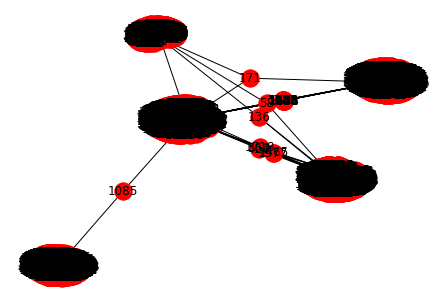

In [50]:
#<-- Write Your Code -->
## Get the top nodes with high centrality 
max_nodes = 10
high_degree_nodes = (df['degree_centrality'].sort_values(ascending=False)[:max_nodes]).index

## Add these nodes to the graph
g1= Graph(directed=False)
for i,rows in df_edges.iterrows():
    if(rows[0] in high_degree_nodes or rows[1] in high_degree_nodes):
        #print("{}--{}".format(rows[0],rows[1]))
        g1.add_edge(rows[0],rows[1])
draw(g1, with_labels=True)
plt.savefig("B_10.png", format="PNG")

Degree centrality shows how many connections a person has. Higher values mean that the node has more connections and is highly "important". However, imagine a spam user who happens to have many fake friends, having a high degree centrality value. In such scenarios, these numbers could really be misleading. A user's importance could be measured by knowing how "central" it is in the network. Furthermore, it should not only depend upon how many connections it has but also how many connections its neighbors have (- and how many connections its neighbors' neighbors have and so on). Identifying whether he is a "key" connector is also important. Going further, we use different measures of centrality : Betweenness and Eighenvector centrality. We will notice that each centrality measure indicates a different type of node importance.  

### Task 1b : Betweenness centrality

One another metric is betweenness centrality, which identifies people who frequently are on the shortest paths between pairs of other people. Recall [Assignment 6 from CMPT 732](https://coursys.sfu.ca/2018fa-cmpt-732-g1/pages/Assign6) where we implemented a parallelized version of Dijkstra's Algorithm in Spark. As a part of this segment, we will implement a simple algorithm to find the node centrality, i.e the number of shortest paths that each node is a part of. Centrality of node `i` is computed by adding up, for every other pair of nodes `j` and `k`, the number of shortest paths between node `j` and node `k` that pass through `i`. Please complete the function below that takes in the graph and returns a dictionary with their node centrality values. You are allowed to use in-built functions for getting the shortest path between two nodes. 

In [55]:
#<-- Write Your Code -->
def get_node_centrality(graph):
    n_spaths = dict.fromkeys(graph,0.0)
    s= dict(all_pairs_shortest_path(graph))
    #print([p for p in s])
    for source in graph:
            for path in s[source].values():
                for node in path[1:]: # ignore firs element (source == node)
                    n_spaths[node] += 1 # this path passes through `node`
    return n_spaths
## Add this value to the user details dataframe. 
node_centrality = get_node_centrality(g)
df['node_centrality'] = df.index.map(lambda x: node_centrality[x])

Betweenness centrality is a normalized form of nodal centrality measure. It is computed by adding up, for every other pair of nodes `j` and `k`, the `proportion` of shortest paths between node `j` and node `k` that pass through `i`. I would highly reccommend you to read about this measure [ online ](https://en.wikipedia.org/wiki/Betweenness_centrality). 

### Task 1c: EighenVector Centrality

As we saw before, computing shortest paths is kind of a pain. For this reason, node and betweenness centrality isn't often used on large networks. The less intuitive (but generally easier to compute) eigenvector centrality is more frequently used. Eigenvector centralities are numbers, one per user, such that each user’s value is a constant multiple of the sum of his neighbors’ values. In this case centrality means being connected to people who themselves are central. The more centrality you are directly connected to, the more central you are. This is of course a circular definition — eigenvectors are the way of breaking out of the circularity. I highly recommend you to read about eighenvectors and their role in finding the centrality measure. For this task you are allowed to use the in-built function for computing eighenvector centrality but before that, please make sure you understand how it works. 

In [ ]:
### Find betweenness centrality
bet = betweenness_centrality(g, normalized=False)
for i in bet.keys():
    print("{} {}".format(i,bet[i]))
    
### Find degree centrality    
#deg = degree_centrality(g)
#for i in deg.keys():
    #print("{} {}".format(i,deg[i]))

### Find eigen centrality    
#eig = eigenvector_centrality(g)
#for i in eig.keys():
    #print("{} {}".format(i,eig[i]))

def get_eigenvector_centrality(G, max_iter=100, tol=1.0e-6, nstart=None, 
                           weight='weight'): 
    """Compute the eigenvector centrality for the graph G. 
  
    Eigenvector centrality computes the centrality for a node based on the 
    centrality of its neighbors. The eigenvector centrality for node `i` is 
  
    .. math:: 
  
        \mathbf{Ax} = \lambda \mathbf{x} 
  
    where `A` is the adjacency matrix of the graph G with eigenvalue `\lambda`. 
    By virtue of the Perron–Frobenius theorem, there is a unique and positive 
    solution if `\lambda` is the largest eigenvalue associated with the 
    eigenvector of the adjacency matrix `A` ([2]_). 
  
    Parameters 
    ---------- 
    G : graph 
      A networkx graph 
  
    max_iter : integer, optional 
      Maximum number of iterations in power method. 
  
    tol : float, optional 
      Error tolerance used to check convergence in power method iteration. 
  
    nstart : dictionary, optional 
      Starting value of eigenvector iteration for each node. 
  
    weight : None or string, optional 
      If None, all edge weights are considered equal. 
      Otherwise holds the name of the edge attribute used as weight. 
  
    Returns 
    ------- 
    nodes : dictionary 
       Dictionary of nodes with eigenvector centrality as the value. 
  
        
    Notes 
    ------ 
    The eigenvector calculation is done by the power iteration method and has 
    no guarantee of convergence. The iteration will stop after ``max_iter`` 
    iterations or an error tolerance of ``number_of_nodes(G)*tol`` has been 
    reached. 
  
    For directed graphs this is "left" eigenvector centrality which corresponds 
    to the in-edges in the graph. For out-edges eigenvector centrality 
    first reverse the graph with ``G.reverse()``. 
  
     
    """
    from math import sqrt 
    if type(G) == nx.MultiGraph or type(G) == nx.MultiDiGraph: 
        raise nx.NetworkXException("Not defined for multigraphs.") 
  
    if len(G) == 0: 
        raise nx.NetworkXException("Empty graph.") 
  
    if nstart is None: 
  
        # choose starting vector with entries of 1/len(G) 
        x = dict([(n,1.0/len(G)) for n in G]) 
    else: 
        x = nstart 
  
    # normalize starting vector 
    s = 1.0/sum(x.values()) 
    for k in x: 
        x[k] *= s 
    nnodes = G.number_of_nodes() 
  
    # make up to max_iter iterations 
    for i in range(max_iter): 
        xlast = x 
        x = dict.fromkeys(xlast, 0) 
  
        # do the multiplication y^T = x^T A 
        for n in x: 
            for nbr in G[n]: 
                x[nbr] += xlast[n] * G[n][nbr].get(weight, 1) 
  
        # normalize vector 
        try: 
            s = 1.0/sqrt(sum(v**2 for v in x.values())) 
  
        # this should never be zero? 
        except ZeroDivisionError: 
            s = 1.0
        for n in x: 
            x[n] *= s 
  
        # check convergence 
        err = sum([abs(x[n]-xlast[n]) for n in x]) 
        if err < nnodes*tol: 
            return x 
  
    raise nx.NetworkXError("""eigenvector_centrality(): power iteration failed to converge in %d iterations."%(i+1))""")

In [ ]:
#<-- Write Your Code -->
# Find EighenVector centrality
eig = eigenvector_centrality(g)

df['eighenvector_centrality'] = df.index.map(lambda x: eig[x])
df.head()

In order to inspect the difference between the degree centrality and nodal centrality and eighenvector centrality we plot a line chart for the top 100 users with highest degree centrality showing how these numbers can be different for different users. 

In [ ]:
#<-- Write Your Code -->

Observe the graph closely and write two most interesting insights from the above plot.
* [1]
* [2]

> `the students are expected to lists points which prove why these measures are fair parameters for judging the credibility of users on a social media platform. Especially when you are given dataset in the form of graphical nodes and edges.`

Add the three parameters found above closeness_centrality, betweenness_centrality and eighenvector_centrality to the file `facebook_info.csv` . This file will be used later for Task 2. 

## Part 2: Modelling and Parameter Tuning in Spark
### Task 3a:  Cross Validation
Now as a part of this step, we expect you to use the above two created fields and use it one by one (along with original fields in the dataset) to train any of the three machine learning models (we studied) based on ones you think will be suitable for the problem set and compare the results. Based on the results obtained. Answer the questions below and submit the answer file as answer.txt. Remember to not exceed more than 3 sentences for each question.



Hint: https://spark.apache.org/docs/latest/ml-tuning.html
https://rawgit.com/sfu-db/bigdata-cmpt733/master/Assignments/A5/A5.html
https://towardsdatascience.com/build-an-end-to-end-machine-learning-model-with-mllib-in-pyspark-4917bdf289c5
https://www.oreilly.com/ideas/big-datas-biggest-secret-hyperparameter-tuning
https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/3741049972324885/3783546674231736/4413065072037724/latest.html

In [57]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
# The code will tune the following two parameters on the training dataset:
# 
#   numFeatures=1000, 5000, 10000
#   regParam=0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
# 
# and will use 2-fold cross-validation for model evaluation.

### Task 3b: Train Validation Split

In [56]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit


### Task 4 :
   * q1) Which 3 models did you choose and why? Explain reasons behind chosing these 3 ML models.
   * q2) Compare the performance of these three models and explain. Why do you think you get such results. 
   * q3) What is the evaluation method you used?
   * q4) Do you think adding the inferential feature vectors (Betweeness and eighenvector) for centrality was a good idea and why? Can you think of a different approach for solving this problem (other than Social Network Graphical analysis)

Submit all the files in a zipped format under Coursys.

### Dataset Locations (potential links) :-
* https://github.com/awesomedata/awesome-public-datasets
  * https://github.com/awesomedata/awesome-public-datasets#complexnetworks
  * https://github.com/awesomedata/awesome-public-datasets#socialnetworks
  * https://github.com/awesomedata/awesome-public-datasets#searchengines
  * http://www-personal.umich.edu/~mejn/netdata/
  * https://www.kdnuggets.com/2014/08/interesting-social-media-datasets.html+
  * google keyword (awesome public datasets social network)
  * http://snap.stanford.edu/data/